In [1]:
import numpy as np
import matplotlib.pyplot as plt


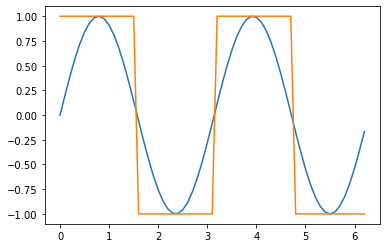

In [2]:
# training sets

# x vector 
step_size = 0.1
x = np.arange(0,2*np.pi,step_size)

# sine wave
ys = np.sin(2*x)
plt.plot(x,ys)

# square wave
ysq = [1 if a >=0 else -1 for a in ys]
plt.plot(x,ysq)

#Testing sets
xtest = np.arange(0.05,2*np.pi,step_size)
sintest = np.sin(2*xtest)
squaretest = [1 if a>=0 else -1 for a in sintest]





In [3]:
def gauss(x,mu,sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))


[5.70016461e-01 5.69949930e-01 5.08814962e-01 5.31354890e-01
 9.17845300e-02 9.11502583e-02 7.83873485e-02 3.77182490e-02
 2.20944440e-02 8.49161323e-03 3.70057585e-03 1.19756296e-03
 3.10532925e-04 9.96500634e-05]


Text(0.5, 1.0, 'Error for sin')

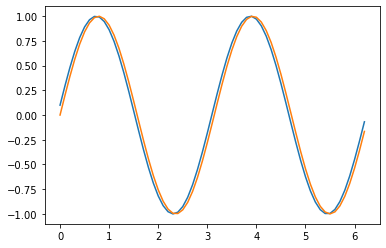

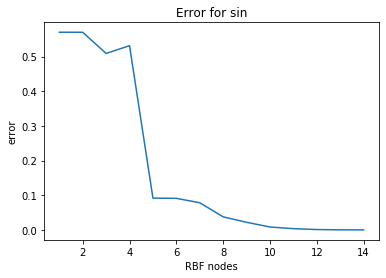

In [4]:
# 3.1.1 Try to vary the number of units to obtain the...

nRbfNodes = 15 # max number of units
n = len(x)
errors =[]
sigma = 1 

save = np.zeros((n,nRbfNodes))

# vary from 1 to max number of RBF units
for j in range(1,nRbfNodes):
    phis = np.zeros([n,j])
    phis_test = np.zeros([n,j])

    mus = [i/j*2*np.pi for i in range(j)]

    for i in range(j):
        phis[:,i] = gauss(x,mus[i],sigma)
        phis_test[:,i] = gauss(xtest,mus[i],sigma)

    a = np.dot(phis.T,phis)
    b = np.dot(phis.T,ys)
    W = np.linalg.solve(a,b)

    error = np.mean(abs(np.dot(phis_test,W)-sintest)) 
    errors.append(error)
    save[:,j] = np.dot(phis_test,W)
    
errors = np.array(errors)

print(errors)

plt.plot(x,save[:,13], x,ys)


plt.figure()

plt.plot(range(1,nRbfNodes),errors)
plt.xlabel('RBF nodes')
plt.ylabel('error')
plt.title('Error for sin')

# first error below 0.1 is 5 units
# first error below 0.01 is 10 units
# first error below 0.001 is 13 units




[0.83823442 0.83898429 0.75329235 0.77840228 0.29120547 0.30648075
 0.28699789 0.28732345 0.28407749 0.27290416 0.2660071  0.27218914
 0.26993024 0.2345492  0.21551605 0.2130439  0.23555719 0.20001613
 0.19512913 0.53340007 0.20804665 0.18988592 0.19300307 0.1959385
 0.23546216 0.1954184  0.2094698  0.2581486  0.18710324 0.19189037
 0.19512529 0.19287887 0.19447962 0.21861909 0.18992725 0.20176721
 0.19439787 0.1935513  0.22342795 0.24538654 0.20838883 0.2034929
 0.2075716  0.20198389 0.19257712 0.20659362 0.21211991 0.19565524
 0.19491917]


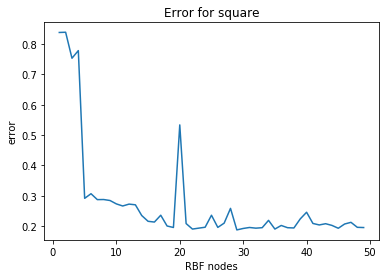

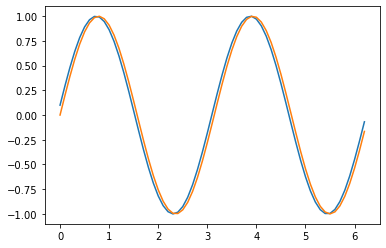

In [5]:
# 3.1.1 SAME BUT FOR SQUARE

nRbfNodes = 50 # max number of units
n = len(x)
errors =[]
sigma = 1

# vary from 1 to max number of RBF units
for j in range(1,nRbfNodes):
    phis = np.zeros([n,j])
    phis_test = np.zeros([n,j])

    mus = [i/j*2*np.pi for i in range(j)]

    for i in range(j):
        phis[:,i] = gauss(x,mus[i],sigma)
        phis_test[:,i] = gauss(xtest,mus[i],sigma)

    a = np.dot(phis.T,phis)
    b = np.dot(phis.T,ysq)
    W = np.linalg.solve(a,b)

    error = np.mean(abs(np.dot(phis_test,W)-squaretest)) 
    errors.append(error)
    save[:,j] = np.dot(phis_test,W)

    
errors = np.array(errors)

print(errors)

plt.plot(range(1,nRbfNodes),errors)
plt.xlabel('RBF nodes')
plt.ylabel('error')
plt.title('Error for square')

# error is never below 0.1 
plt.figure()
plt.plot(x,save[:,13], x,ys)




[0.98412698 0.73015873 0.6984127  0.34920635 0.03174603 0.06349206
 0.         0.03174603 0.03174603 0.03174603 0.03174603 0.
 0.0952381  0.06349206 0.0952381  0.0952381  0.0952381  0.0952381
 0.06349206]


Text(0.5, 1.0, 'Error for square')

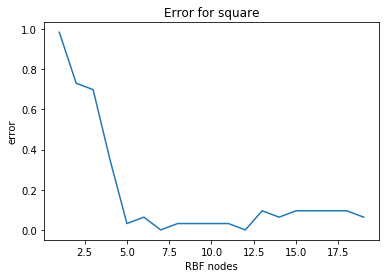

In [6]:
# 3.2.2 How can you simply transform the output....


nRbfNodes = 20 # max number of units
n = len(x)
errors =[]
sigma = 1

# vary from 1 to max number of RBF units
for j in range(1,nRbfNodes):
    phis = np.zeros([n,j])
    phis_test = np.zeros([n,j])

    mus = [i/j*2*np.pi for i in range(j)]

    for i in range(j):
        phis[:,i] = gauss(x,mus[i],sigma)
        phis_test[:,i] = gauss(xtest,mus[i],sigma)

    a = np.dot(phis.T,phis)
    b = np.dot(phis.T,ysq)
    W = np.linalg.solve(a,b)
    
    # new for this part. makes error to zero
    C = np.dot(phis_test,W)
    C = [1 if C[i] >=0 else -1 for i in range(len(C))] 
    C = np.array(C)
    
    error = np.mean(abs(C-squaretest)) 
    errors.append(error)
    
errors = np.array(errors)

print(errors)

plt.plot(range(1,nRbfNodes),errors)
plt.xlabel('RBF nodes')
plt.ylabel('error')
plt.title('Error for square')

# error is 0 after 7 units


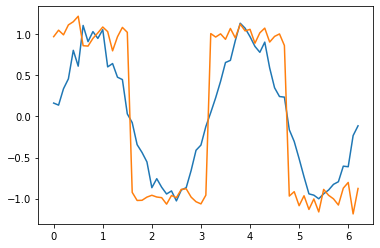

In [7]:
# 3.2 Add noise to variable

# training sets
# x vector 
step_size = 0.1
x = np.arange(0,2*np.pi,step_size)
# sine wave
ys = np.sin(2*x)
# square wave
ysq = [1 if a >=0 else -1 for a in ys]

#Testing sets
xtest = np.arange(0.05,2*np.pi,step_size)
sintest = np.sin(2*xtest)
squaretest = [1 if a>=0 else -1 for a in sintest]

# Add noise
np.random.seed(1)
ys = ys+ np.random.normal(0,0.1,len(ys))
ysq = ysq + np.random.normal(0,0.1,len(ysq))
sintest = sintest + np.random.normal(0,0.1,len(sintest))
squaretest = squaretest+ np.random.normal(0,0.1,len(squaretest))

plt.plot(x,ys)
plt.plot(x,ysq)


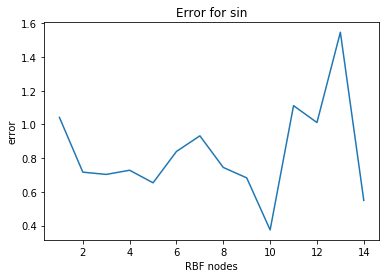

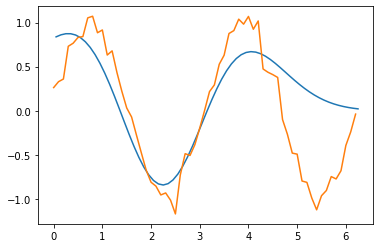

In [8]:
# 3.2 online learning delta rule 


nRbfNodes = 15 # max number of units
n = len(x)
errors =[]
eta = 0.001

# vary from 1 to max number of RBF units

W_save = np.zeros((nRbfNodes-1,nRbfNodes-1))
approx_save = np.zeros((n,nRbfNodes))


for j in range(1,nRbfNodes):
    sigma = 1# 2*np.pi/nRbfNodes

    W = np.random.normal(0,1,j)
 
    mus = [i/nRbfNodes*2*np.pi for i in range(j)]  
    
    phis = np.zeros(j)
    phis_test = np.zeros((n,j))
    
    for ii, xx in enumerate(x):
        xxtest= xtest[ii]
        
        for i in range(j):
            phis[i] = gauss(xx,mus[i],sigma)
            phis_test[ii,i] = gauss(xxtest,mus[i],sigma)
        
        for jj in range(10):
            deltaW = eta*np.dot((ys[ii]-np.dot(phis,W)),phis)
            W = W+deltaW

        
    W_save[j-1,:j] = W

    error = np.mean(abs(np.dot(phis_test,W)-sintest))
    approx_save[:,j] = np.dot(phis_test,W)
    errors.append(error)
    
errors = np.array(errors)


plt.plot(range(1,nRbfNodes),errors)
plt.xlabel('RBF nodes')
plt.ylabel('error')
plt.title('Error for sin')

plt.figure()

plt.plot(xtest,approx_save[:,10], x,sintest)



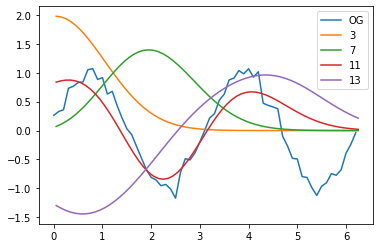

In [9]:
plt.plot(x,sintest)

plt.plot(xtest,approx_save[:,2])
plt.plot(xtest,approx_save[:,6])
plt.plot(xtest,approx_save[:,10])
plt.plot(xtest,approx_save[:,12])
plt.legend(['OG','3','7','11','13'])






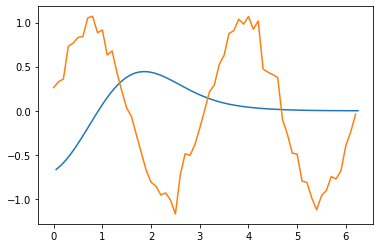

In [10]:
plt.plot(xtest,approx_save[:,8])
plt.plot(x,sintest)
